In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Random Walk

A random walk is an example of a **stochastic process**, an equation that depends on random variables:

$$X_t = X_{t-1} + W_t,$$

Your random variable at time $t$ is dependent on your previous position at $t$-1 and a random term $W_t$. 

Where $$W_t = \mu + \sigma Z_t, \quad Z_t\sim\mathcal{N}(0, 1).$$ and $\mu$ is the expected return (drift term) and $\sigma$ is the standard deviation. 

Stock prices move very much like **Geometric Brownian Motion**: 

$$\Delta S_k =  \mu S_k\Delta t + \sigma S_k \Delta Z_k = S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$$

Now let's simulate a random walk for $T = 252$ days with an initial price of $10$, $\mu$ of $10$ percent a year, and $\sigma = 0.5/T$

In [ ]:
T = 252
S0 = 10
mu = .25/T # really mu/T
sigma = .02

S_pos = [S0]

Z = np.random.normal(0,1, size = T) #random.normal takes mean and standard deviation, NOT variance!

for t in range(0, T):
    S_pos.append(S_pos[t] + S_pos[t]*(mu + sigma*Z[t]))
    
plt.plot(S_pos)

Play around with $\mu$ and $\sigma$ and see what happens.

## 2D Random Walk Example

In [ ]:
import random

steps = 20000     

x = np.zeros(steps)
y = np.zeros(steps)
for i in range(1, steps):
    (dx, dy) = random.choice([(1,0),(-1,0),(0,1),(0,-1)])
    x[i] = x[i-1] + dx 
    y[i] = y[i-1] + dy
        
plt.figure(figsize = (10,10))
plt.grid()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D random walk")

plt.plot(0,0, 'g*', markersize=10)
plt.plot(x[-1],y[-1], 'r*', markersize=10)

# Try these problems out:

### Using Monte Carlo Simulations, simulate 1,000 1D random walks with 200 steps each. Assume that at each iterations there is an equal probability of going left or right.

### Plot a histogram to check the distribution of the ending points.

One way to do it is to use np.random.choice, and to get the last element of a list, do "list_1[-1]".

(array([  1.,   1.,   5.,   7.,  22.,  28.,  56.,  85., 131., 114., 119.,
        145.,  98.,  93.,  40.,  32.,  14.,   7.,   0.,   2.]),
 array([-51. , -46.1, -41.2, -36.3, -31.4, -26.5, -21.6, -16.7, -11.8,
         -6.9,  -2. ,   2.9,   7.8,  12.7,  17.6,  22.5,  27.4,  32.3,
         37.2,  42.1,  47. ]),
 <BarContainer object of 20 artists>)

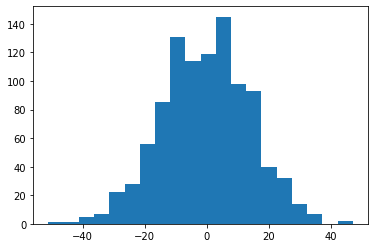

In [4]:
num_walks = 1000
Ns = 200
Final_Pos = []

for walks in range(num_walks):
    pos = np.zeros(Ns)  
    for j in range(Ns-1):
        pos[j+1] = pos[j] + np.random.choice([-1,1])
        
    Final_Pos.append(pos[-1])  ###append the final position


plt.hist(Final_Pos, bins = 20)

### Now back to finance, do something similar.

In finance, the log of the stock price $\log(S_t)$ is a random walk:

$$\log(S_t) = \log(S_{t-1}) + W_t.$$ Ignore the logs for now, we will focus on geometric brownian motion: 
$$\Delta S_k =  \mu S_k\Delta t + \sigma S_k \Delta Z_k = S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$$



### Create 5,000 of random walkers with the same initial conditions, up to you to make them whatever.

### Plot a histogram to check the distribution of their ending points, you can normalize if you want.